In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

##  sklearn `CountVector, TfidfTransformer`

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np

In [3]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

m = CountVectorizer()
X = m.fit_transform(corpus)

In [4]:
X
X.toarray()

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [5]:
m.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [22]:
m2 = TfidfTransformer(norm=None, smooth_idf=False)
m2
Y = m2.fit_transform(X)

y = np.round(Y.toarray(), 2)
y

TfidfTransformer(norm=None, smooth_idf=False, sublinear_tf=False,
         use_idf=True)

array([[0.  , 1.29, 1.69, 1.29, 0.  , 0.  , 1.  , 0.  , 1.29],
       [0.  , 1.29, 0.  , 1.29, 0.  , 4.77, 1.  , 0.  , 1.29],
       [2.39, 0.  , 0.  , 0.  , 2.39, 0.  , 1.  , 2.39, 0.  ],
       [0.  , 1.29, 1.69, 1.29, 0.  , 0.  , 1.  , 0.  , 1.29]])

## 自己算

tf-idf 

$$ w_{i,j} = tf_{i, j} * idf_{j} = \frac{n_{i,j}}{n_i}  log(\frac{D}{D_j}) $$

In [16]:
x = X.toarray()
x

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [17]:
tf_array = x / x.sum(axis=1)[:, None]
tf_array

array([[0.        , 0.2       , 0.2       , 0.2       , 0.        ,
        0.        , 0.2       , 0.        , 0.2       ],
       [0.        , 0.16666667, 0.        , 0.16666667, 0.        ,
        0.33333333, 0.16666667, 0.        , 0.16666667],
       [0.25      , 0.        , 0.        , 0.        , 0.25      ,
        0.        , 0.25      , 0.25      , 0.        ],
       [0.        , 0.2       , 0.2       , 0.2       , 0.        ,
        0.        , 0.2       , 0.        , 0.2       ]])

In [18]:
D = X.shape[0]
D
idf_array = np.log(D / (x>0).sum(axis=0))
idf_array

4

array([1.38629436, 0.28768207, 0.69314718, 0.28768207, 1.38629436,
       1.38629436, 0.        , 1.38629436, 0.28768207])

In [21]:
res = np.round(tf_array * idf_array, 2)
res

array([[0.  , 0.06, 0.14, 0.06, 0.  , 0.  , 0.  , 0.  , 0.06],
       [0.  , 0.05, 0.  , 0.05, 0.  , 0.46, 0.  , 0.  , 0.05],
       [0.35, 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.35, 0.  ],
       [0.  , 0.06, 0.14, 0.06, 0.  , 0.  , 0.  , 0.  , 0.06]])

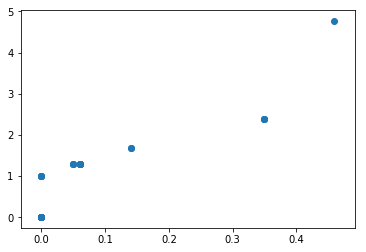

In [25]:
## TODO: 对不上？

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(res, y)

## sklearn `TfidfVectorizer`

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
m0 = TfidfVectorizer(norm=None, smooth_idf=False)
m0

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_idf=False,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [145]:
X = m0.fit_transform(corpus)

In [146]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [147]:
X.toarray()

array([[0.        , 1.28768207, 1.69314718, 1.28768207, 0.        ,
        0.        , 1.        , 0.        , 1.28768207],
       [0.        , 1.28768207, 0.        , 1.28768207, 0.        ,
        4.77258872, 1.        , 0.        , 1.28768207],
       [2.38629436, 0.        , 0.        , 0.        , 2.38629436,
        0.        , 1.        , 2.38629436, 0.        ],
       [0.        , 1.28768207, 1.69314718, 1.28768207, 0.        ,
        0.        , 1.        , 0.        , 1.28768207]])

## About `transform`

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np

### CountVectorizer: just count word occurence

In [25]:
corpus = [
    'A is first',
    'B is second'
]

count_word = CountVectorizer()
count_word.fit(corpus)
X = count_word.transform(corpus)
X = X.toarray()

features = count_word.get_feature_names()

In [26]:
X

array([[1, 1, 0],
       [0, 1, 1]])

In [27]:
features

['first', 'is', 'second']

In [28]:
df = pd.DataFrame(X, columns=features)
df

,first,is,second
0,1,1,0
1,0,1,1


In [45]:
corpus_test = [
    'me is first',
    'you are second',
    'first is is is second'
]

# CountVector.transform() is just count word occurence ...
# ... except that ignore "new" words that did not appear in training corpus

X_test = count_word.transform(corpus_test)
pd.DataFrame(X_test.toarray(), columns=features)

,first,is,second
0,1,1,0
1,0,0,1
2,1,3,1


In [46]:
# check

m = CountVectorizer()

pd.DataFrame(
    m.fit_transform(corpus_test).toarray(),
    columns=m.get_feature_names()
)
# ignoring "new" words, same as above

,are,first,is,me,second,you
0,0,1,1,1,0,0
1,1,0,0,0,1,1
2,0,1,3,0,1,0


### TfidfTransformer: 

In [55]:
tfidf_m = TfidfTransformer()
Z = tfidf_m.fit_transform(X)
Z = Z.toarray()

features = count_word.get_feature_names()

pd.DataFrame(Z, columns=features)

,first,is,second
0,0.814802,0.579739,0.000000
1,0.000000,0.579739,0.814802


In [58]:
Z_test = tfidf_m.transform(X_test)
Z_test = Z_test.toarray()

In [59]:
pd.DataFrame(Z_test, columns=features)

,first,is,second
0,0.814802,0.579739,0.000000
1,0.000000,0.000000,1.000000
2,0.390548,0.833634,0.390548


#### tfidf on test set:

结论：

- IDF array: use **training** set
- TF array: use testing itself's data

注意测试集 document 0 与训练集 document 0 完全一致，transform之后的feature值也一致

由此推断出 idf array 用的是**训练集**的 idf-array, 而不是测试集自身的 idf 

而 tf array 显然(by definition)需要用自身来计算